In [1]:
import os
import numpy as np
import pandas as pd
import torch
import librosa
from audio_utils import load_audio_by_bit
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt 

In [2]:
net_path = "/home/maelle/Results/20210719extract_feat_MIST_ROI_lr0.01_200epochs/sub-01/MIST_ROI_SoundNetEncoding_conv_1000_ks5_lr10_wd0.01_decoupled_lrSch_2021-07-19-23-54-38.pt"

In [3]:
def TSNE_visu(audio_path):
    data = torch.load(net_path)
    net = data['model']
    length = librosa.get_duration(filename = audio_path)
    audio_segment = load_audio_by_bit(audio_path, 0, length, bitSize = 1.49, sr = 22050)
    x = torch.tensor(audio_segment).view(1,1,-1, 1)  
    feat_list = net.extract_feat(x)

    all_low = []
    for k,curlayer in enumerate(feat_list[4:]):
        tsne = TSNE(n_components=2)
        layername = f"{k+5}"
        curlayer = curlayer.squeeze().T
        layer_low = tsne.fit_transform(curlayer)
        tsne.
        print(f"Layer Conv-{layername} shape {curlayer.shape}")
        all_low.append(layer_low)

    for k,curlow in enumerate(all_low):
        layername = f"{k+5}"
        plt.subplot(2,2,k+1)
        plt.scatter(curlow[:,0],curlow[:,1],c=range(curlow.shape[0]),cmap=plt.cm.hot,alpha=0.7)
        plt.colorbar()
        plt.title(f"Conv-{layername}")
    plt.tight_layout()

Layer Conv-5 shape (1620, 256)
Layer Conv-6 shape (811, 512)
Layer Conv-7 shape (406, 1024)
Layer Conv-8 shape (410, 210)


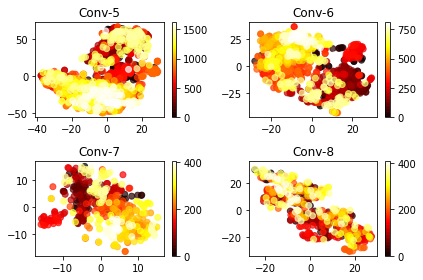

In [9]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/bourne/movie10_bourne01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1620, 256)
Layer Conv-6 shape (811, 512)
Layer Conv-7 shape (406, 1024)
Layer Conv-8 shape (410, 210)


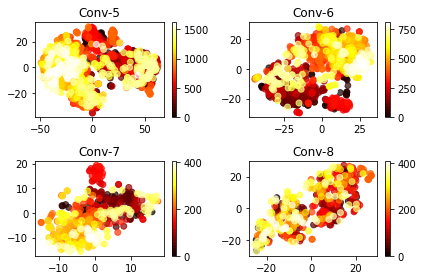

In [10]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/bourne/movie10_bourne01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1620, 256)
Layer Conv-6 shape (811, 512)
Layer Conv-7 shape (406, 1024)
Layer Conv-8 shape (410, 210)


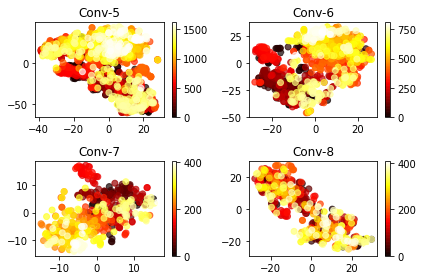

In [11]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/bourne/movie10_bourne01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1636, 256)
Layer Conv-6 shape (819, 512)
Layer Conv-7 shape (410, 1024)
Layer Conv-8 shape (414, 210)


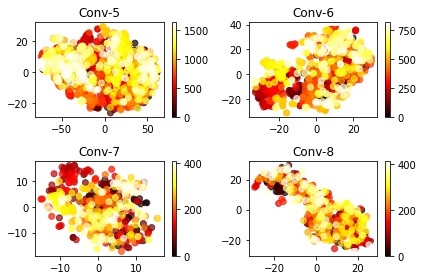

In [5]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/life/movie10_life01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1608, 256)
Layer Conv-6 shape (805, 512)
Layer Conv-7 shape (403, 1024)
Layer Conv-8 shape (407, 210)


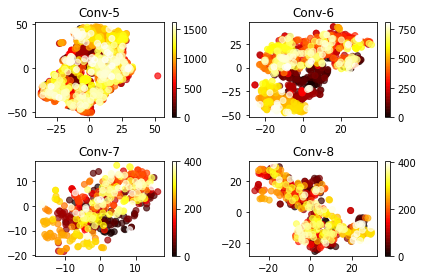

In [7]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/figures/movie10_figures01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


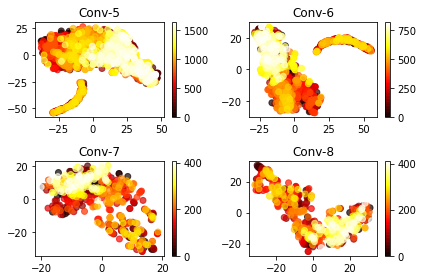

In [8]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


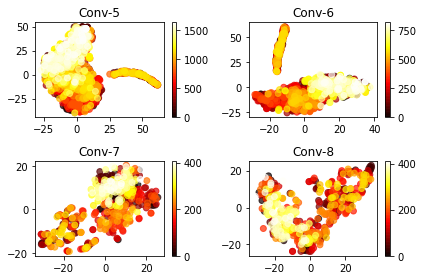

In [12]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


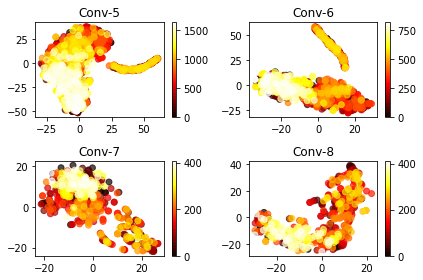

In [13]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf01.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


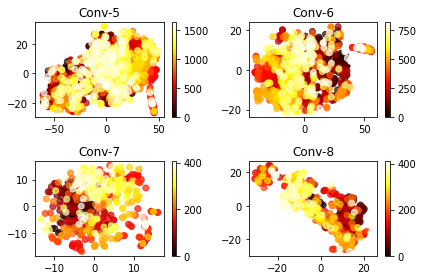

In [14]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf02.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


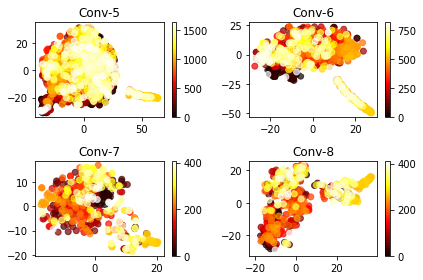

In [15]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf03.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


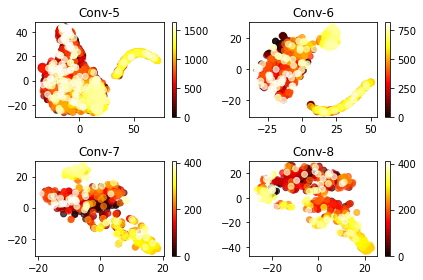

In [16]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf04.wav"
TSNE_visu(audio_path)

Layer Conv-5 shape (1628, 256)
Layer Conv-6 shape (815, 512)
Layer Conv-7 shape (408, 1024)
Layer Conv-8 shape (412, 210)


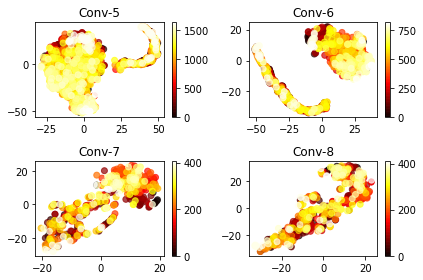

In [17]:
audio_path = "/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf05.wav"
TSNE_visu(audio_path)

In [35]:
audio_path

X,sr = librosa.load(audio_path,sr=None)

In [36]:
X_crop = X[:]

(13342169,)

In [29]:
librosa.__version__

'0.8.1'

In [30]:
from librosa import display

In [45]:
librosa.feature.melspectrogram?

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

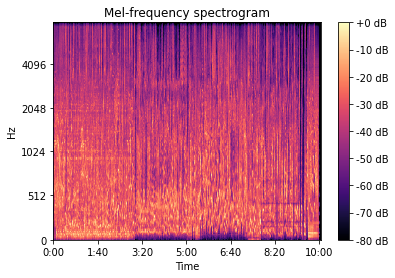

In [78]:
# Passing through arguments to the Mel filters

S = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=256,n_fft=4096*4,

                                    fmax=11000)

fig, ax = plt.subplots()

S_dB = librosa.power_to_db(S, ref=np.max)

img = display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

In [67]:
S_dB.shape

(26059, 128)

In [82]:
S_dB = S_dB.T

In [83]:
tsne_wav = TSNE(n_components=2)

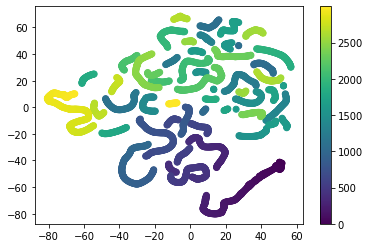

In [84]:
spectro_tsne = tsne_wav.fit_transform(S_dB[:3000,:])
plt.scatter(spectro_tsne[:,0],spectro_tsne[:,1],c=range(spectro_tsne.shape[0]))
plt.colorbar()

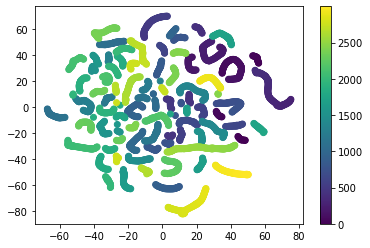

In [85]:
spectro_tsne = tsne_wav.fit_transform(S_dB[3000:6000,:])
plt.scatter(spectro_tsne[:,0],spectro_tsne[:,1],c=range(spectro_tsne.shape[0]))
plt.colorbar()

In [93]:
def TSNE_first(audio_path,dur,tmin=0):
    data = torch.load(net_path)
    net = data['model']
    length = librosa.get_duration(filename = audio_path)
    audio_segment = load_audio_by_bit(audio_path, 0, length, bitSize = 1.49, sr = 22050)
    x = torch.tensor(audio_segment).view(1,1,-1, 1)  
    feat_list = net.extract_feat(x)

    tsne = TSNE(n_components=2)
    curlayer = feat_list[0]
    curlayer = curlayer.squeeze().T
    layer_low = tsne.fit_transform(curlayer[tmin:tmin+dur,:])
    
    return layer_low

In [94]:
audio_path

'/home/maelle/DataBase/stimuli/movie10/wolf/movie10_wolf05.wav'

In [100]:
layer1 = TSNE_first(audio_path,dur=3000,tmin=0)

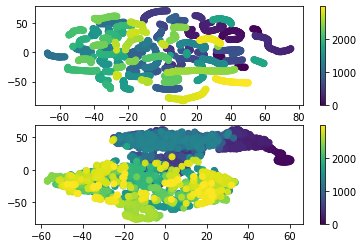

In [101]:
plt.subplot(2,1,1)
plt.scatter(spectro_tsne[:,0],spectro_tsne[:,1],c=range(spectro_tsne.shape[0]))
plt.colorbar()

plt.subplot(2,1,2)
plt.scatter(layer1[:,0],layer1[:,1],c=range(layer1.shape[0]))
plt.colorbar()
